In [1]:
import tensorflow as tf

Segments shape:  (153, 28, 28, 1)


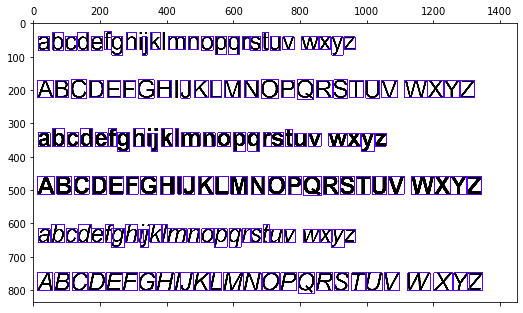

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (5,5)

#read image
img = cv2.imread('alphabet3.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    area = cv2.contourArea(ctr)
    if h>= 20 and w>=8:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        #roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

train = np.array(segments)
print('Segments shape: ', train.shape)

plt.matshow(img)

In [3]:
letter_map = dict(zip(['A','a','B','b','C','c','D','d','E','e','F','f','G','g','H','h','I','i','J', 'j','K','k','L', 'l', 'M', 'm','N', 'n','O', 'o','P', 'p', 'Q', 'q', 'R', 'r', 'S', 's', 'T', 't', 'U', 'u', 'V', 'v', 'W', 'w', 'X', 'x', 'Y', 'y', 'Z', 'z'], range(0,52)))

In [4]:
unique_target = list('bdfhktacegjmnopqrsuvwxyzABCDEFGHJKLMNOPQRSTUVWXYZbdfhkitacegmnopqrsljuvwxyzCGOQSABDEFHIJKLMNPRTUVWXYZbdfhkitacegijmnopqrsuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')

train_target = []
for i in unique_target:
    train_target.append(letter_map[i])
    
train_target = np.array(train_target)

print('Target shape:', train_target.shape)

Target shape: (153,)


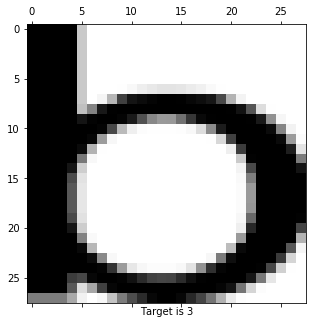

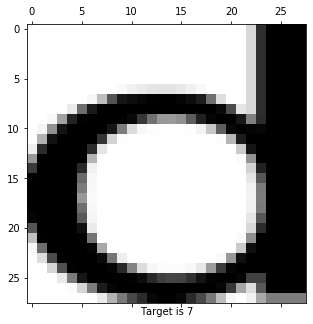

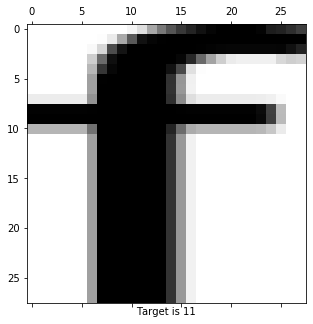

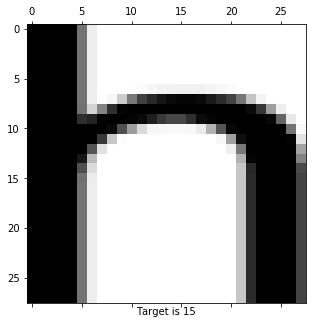

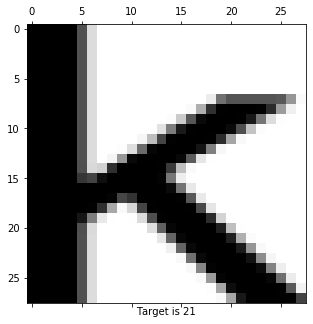

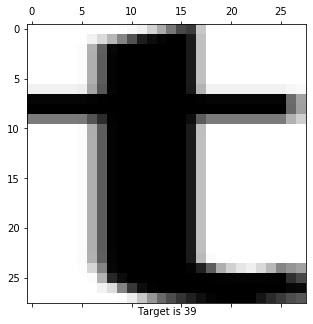

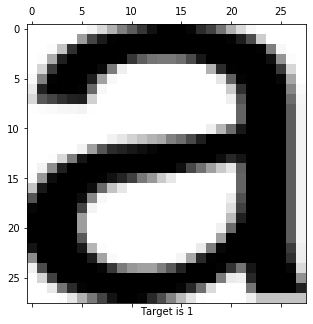

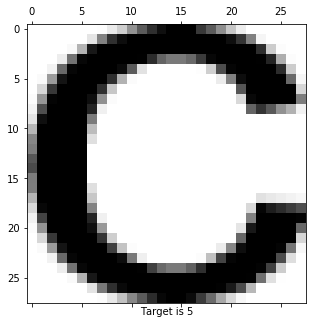

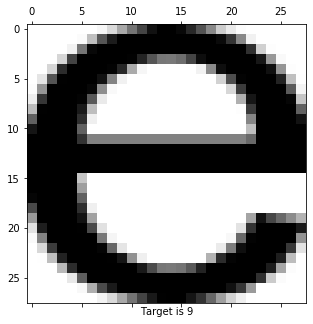

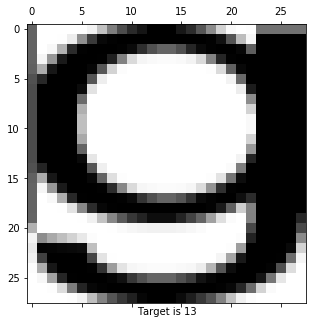

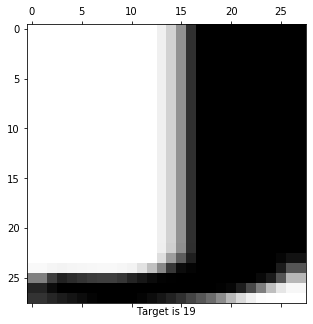

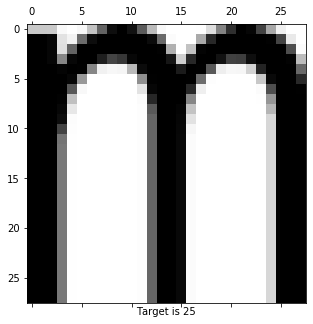

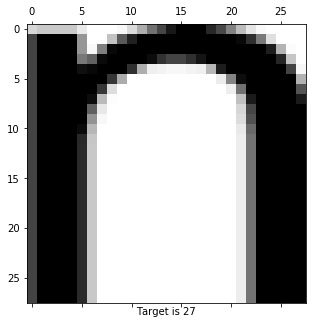

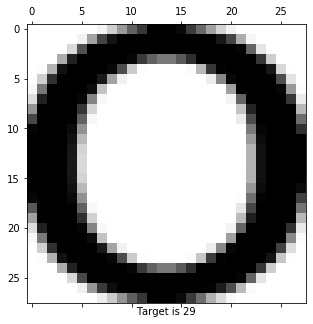

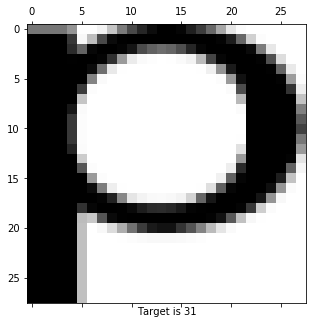

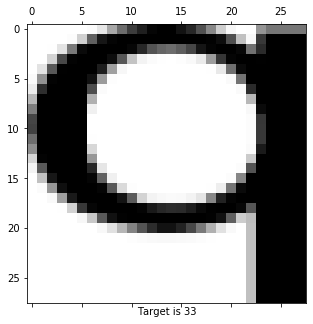

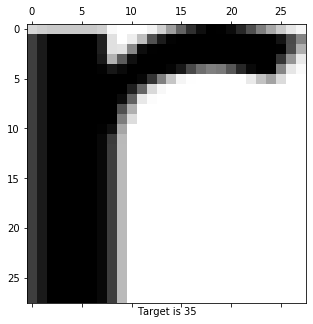

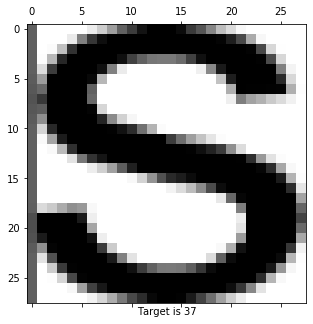

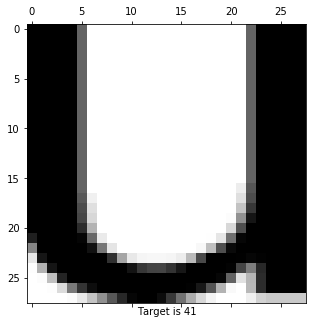

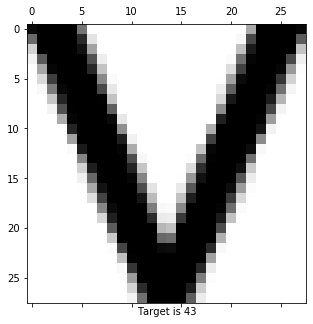

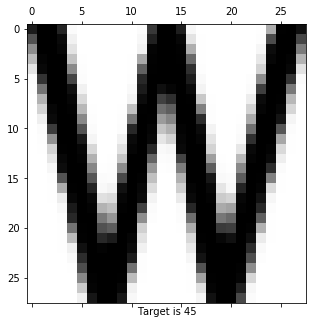

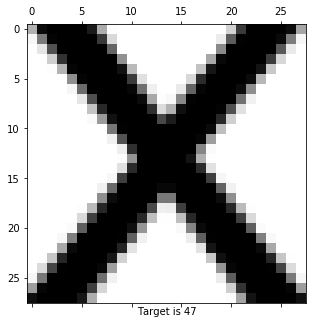

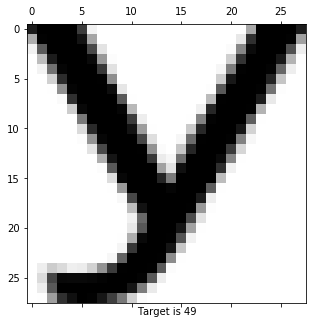

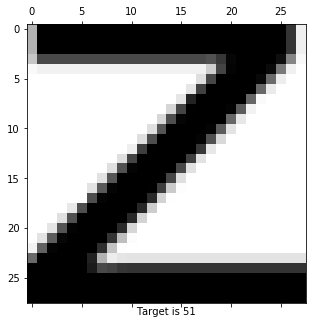

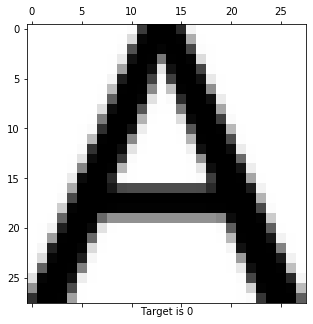

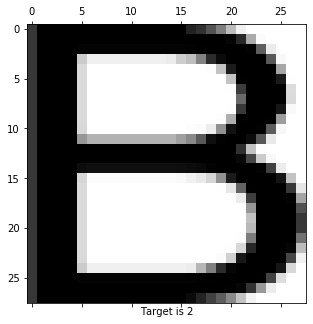

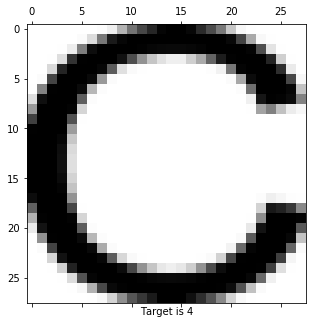

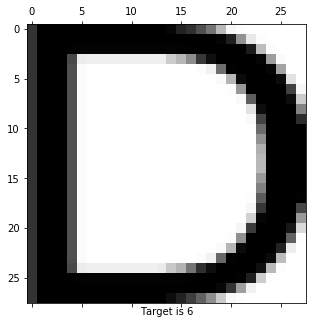

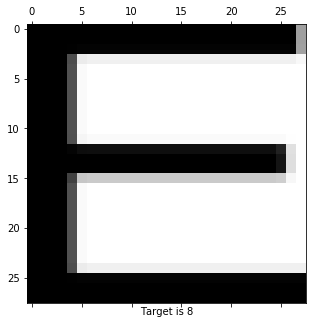

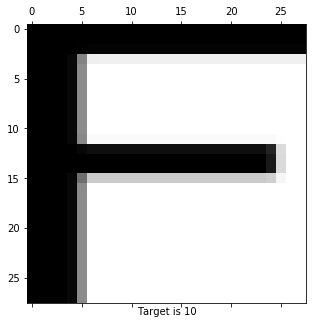

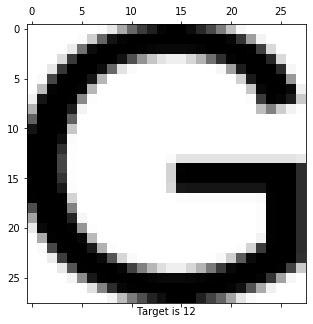

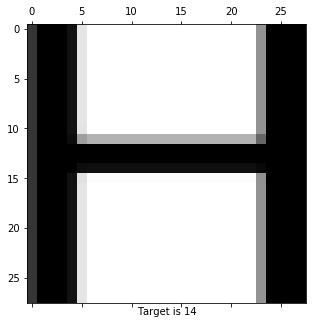

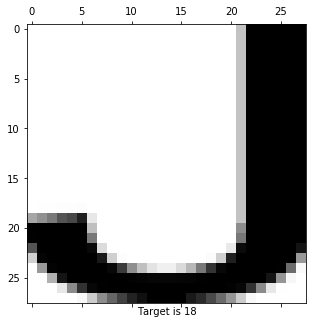

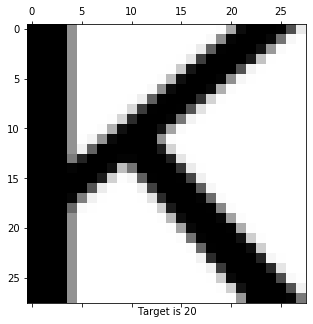

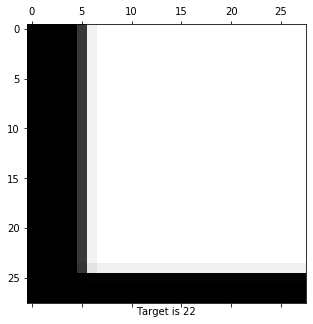

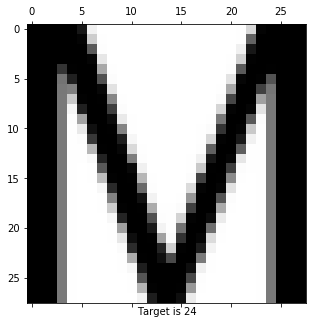

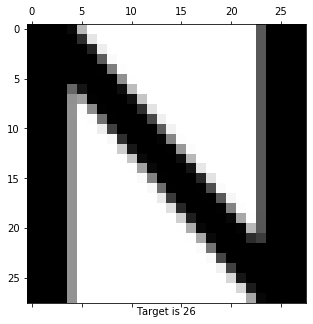

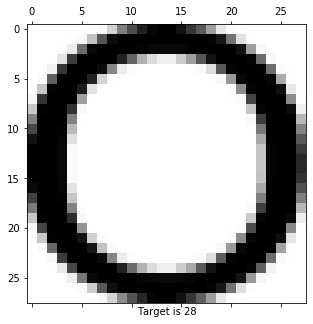

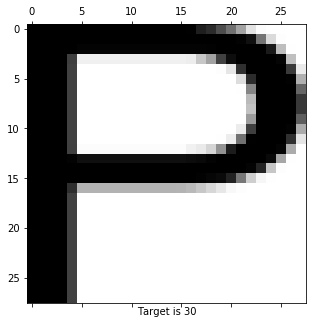

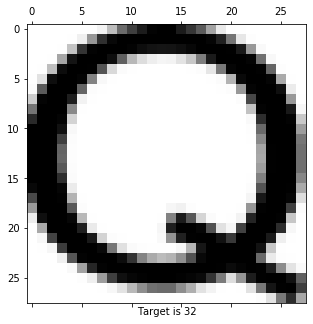

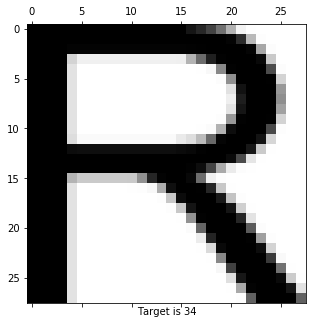

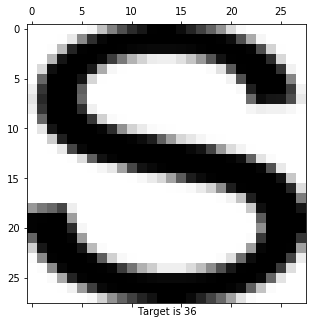

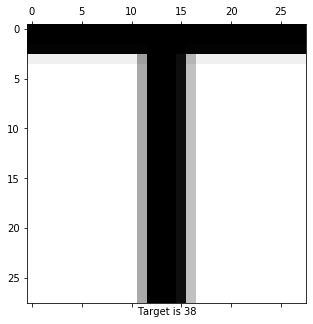

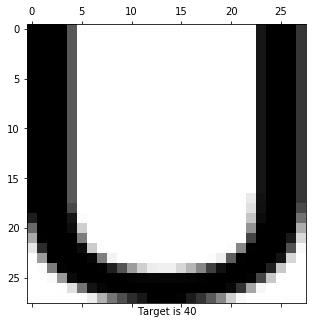

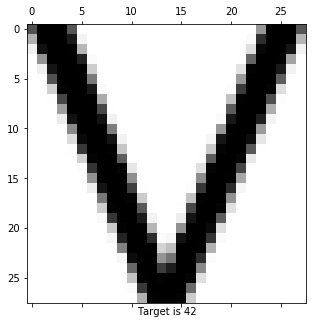

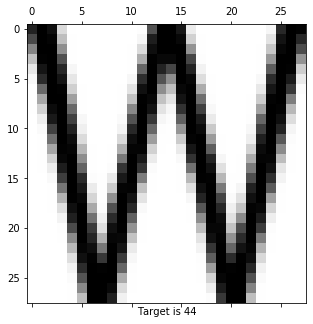

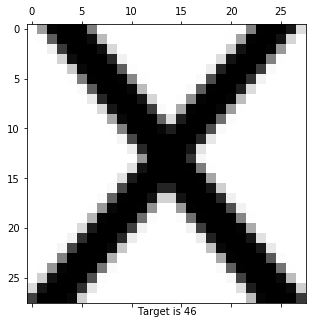

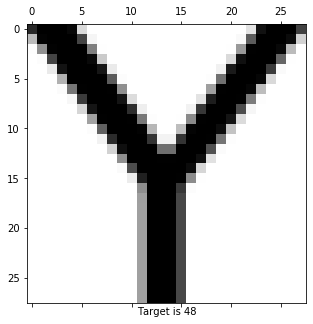

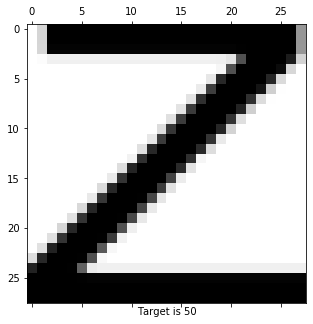

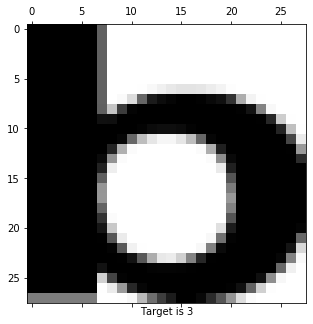

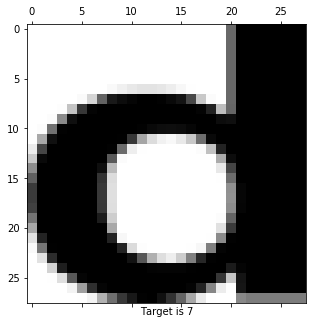

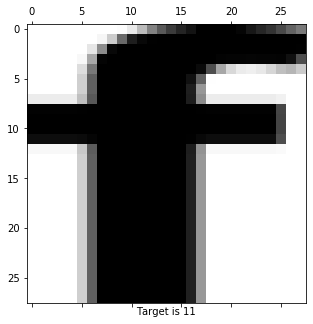

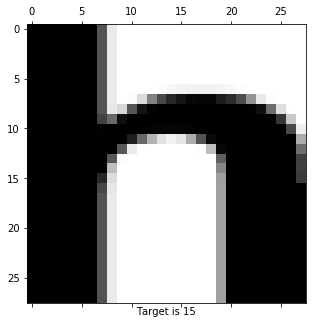

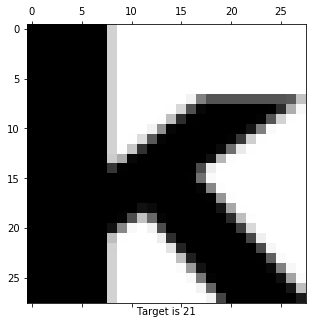

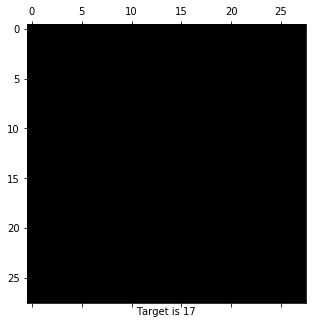

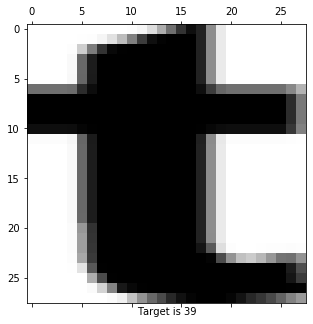

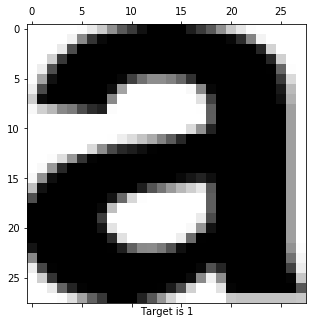

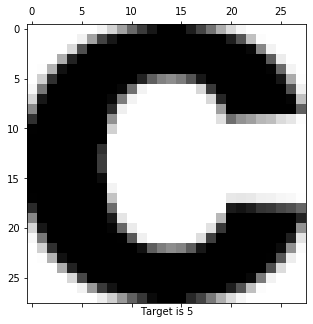

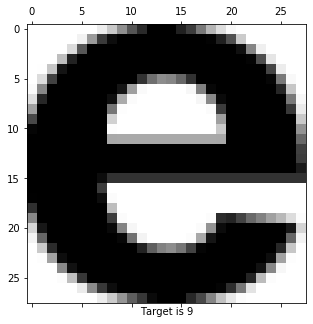

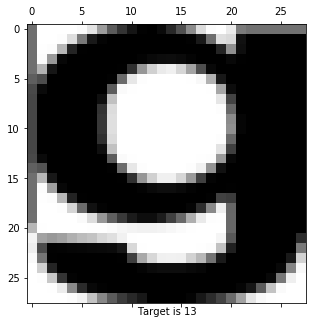

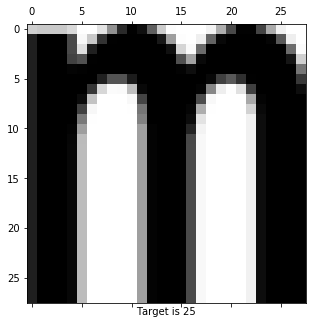

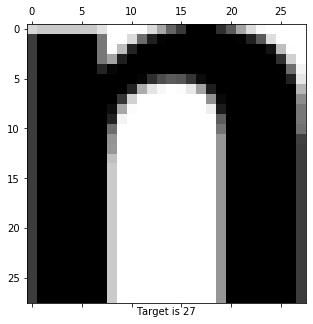

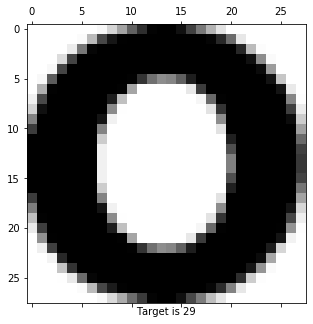

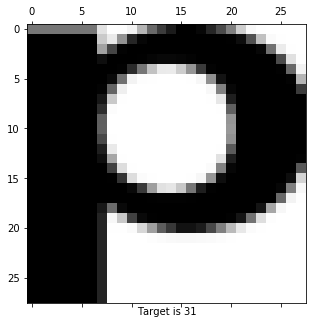

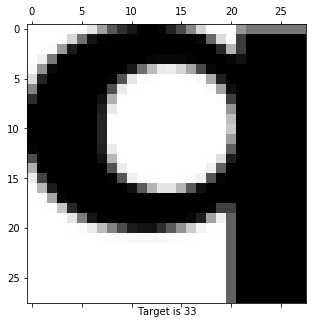

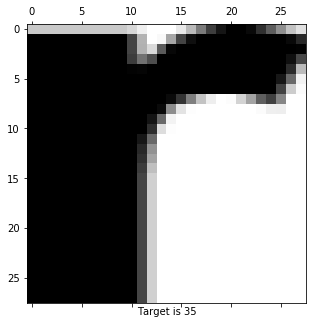

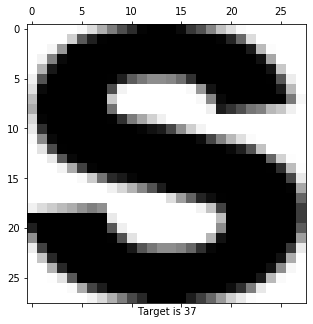

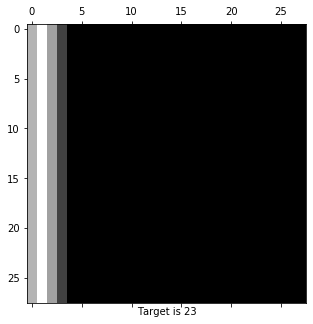

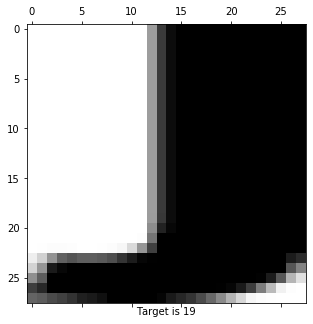

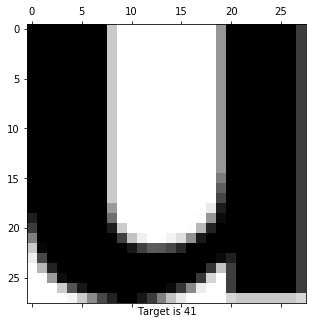

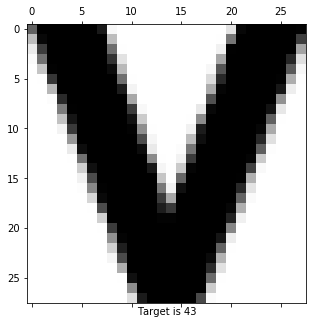

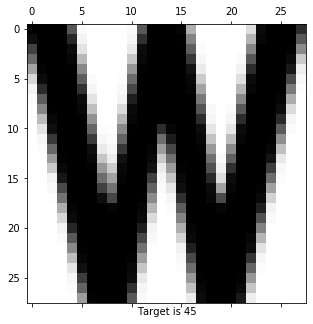

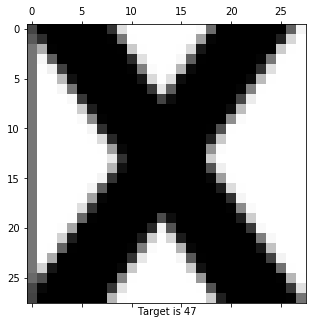

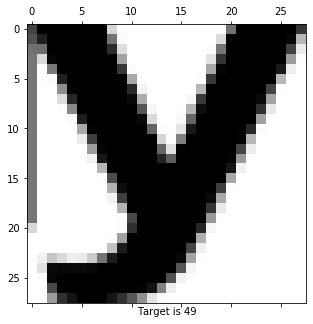

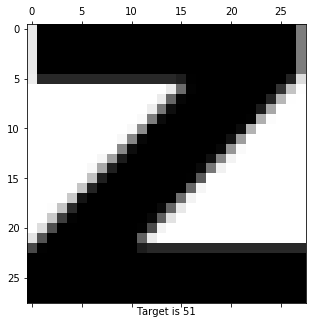

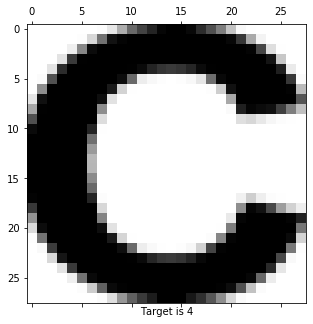

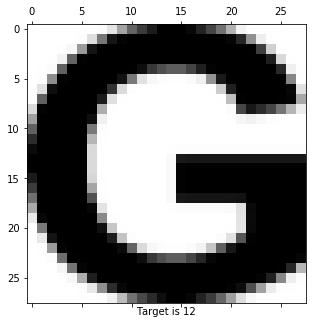

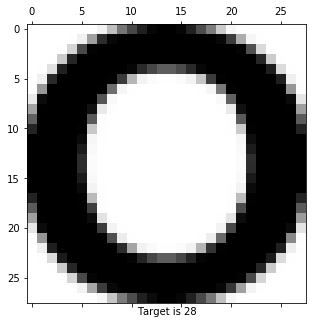

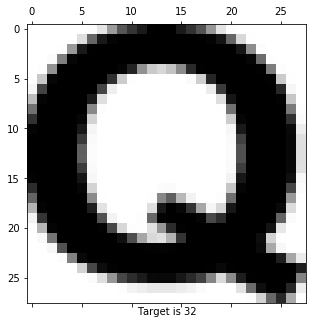

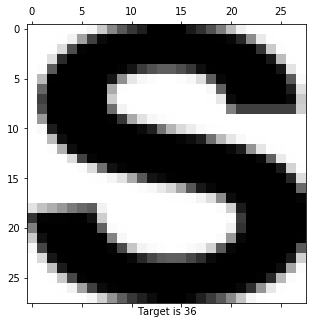

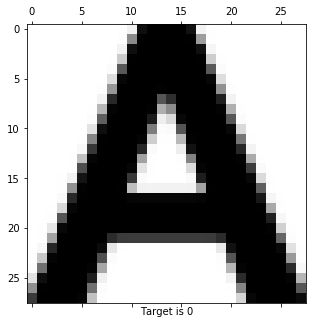

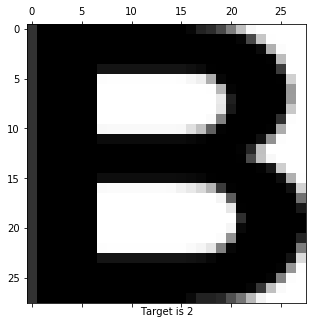

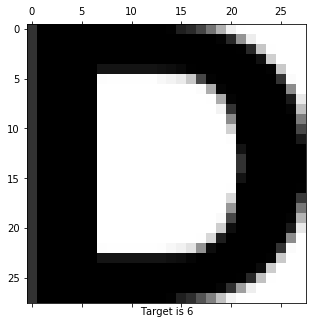

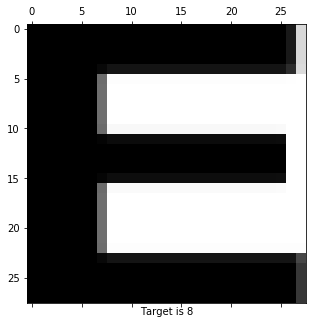

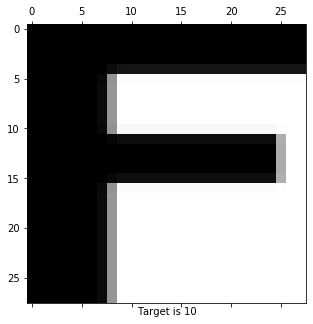

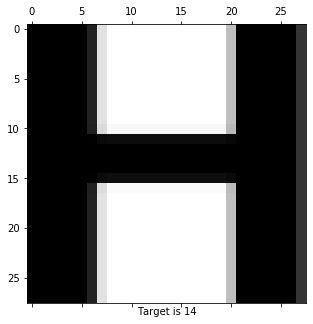

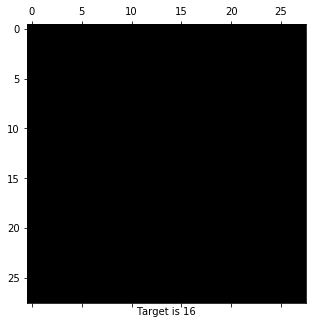

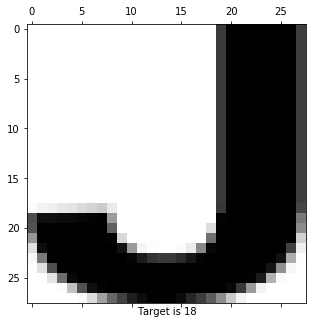

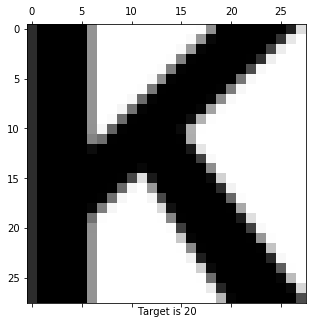

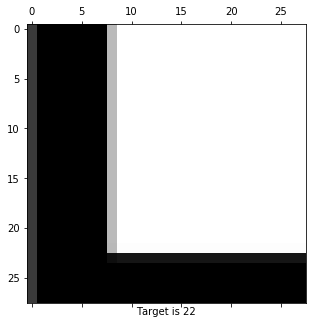

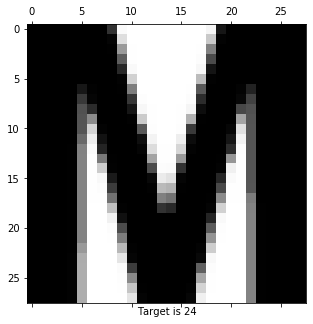

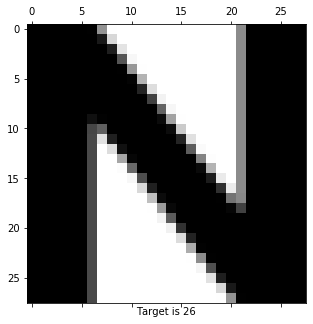

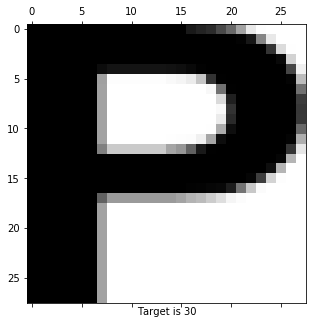

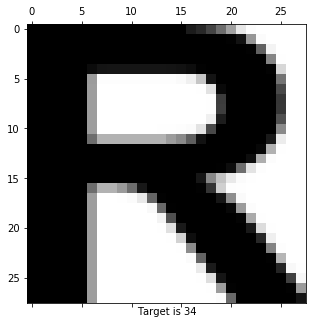

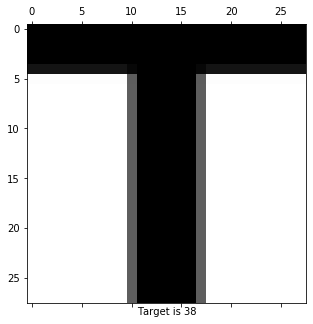

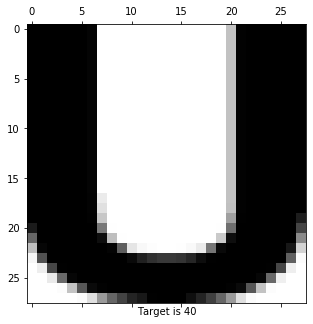

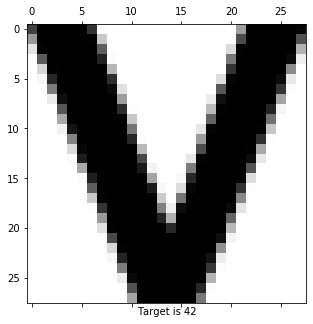

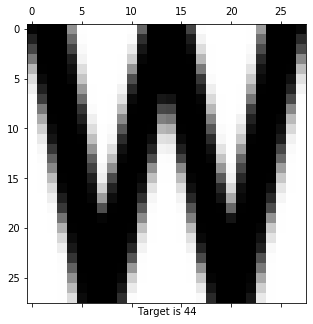

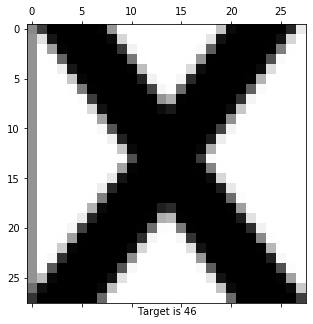

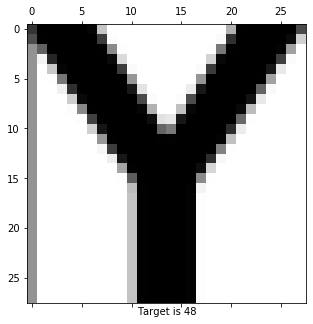

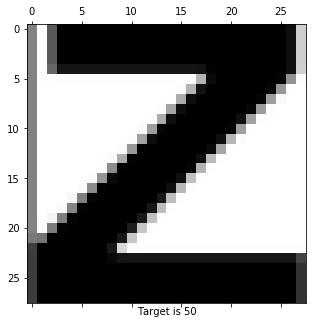

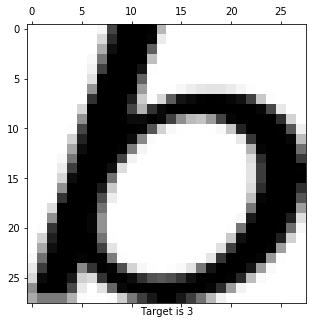

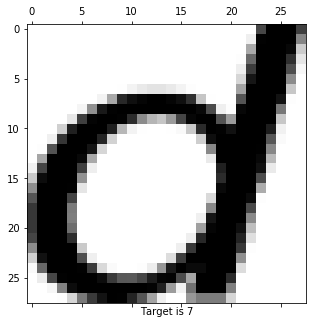

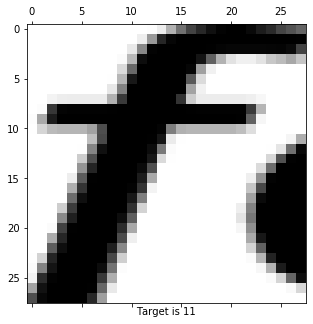

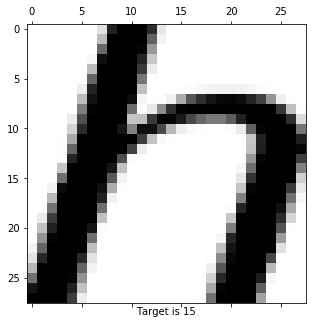

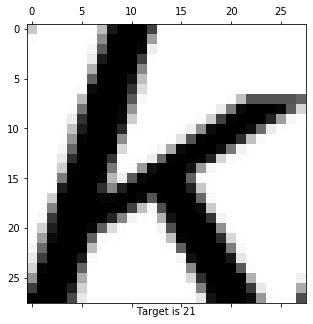

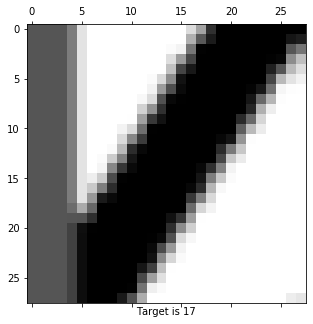

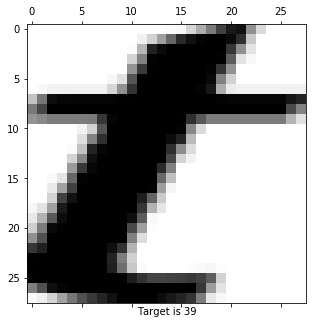

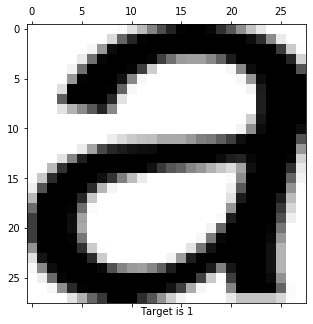

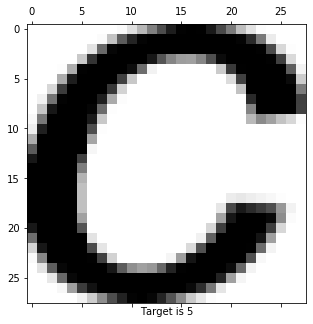

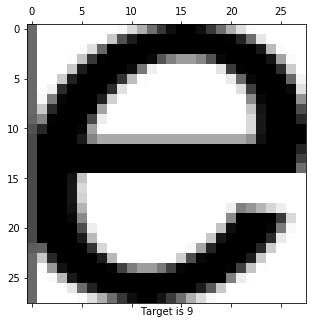

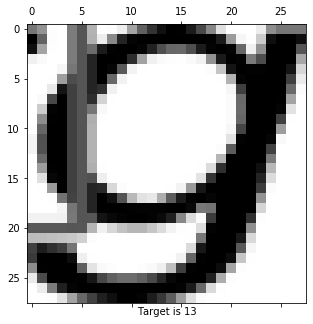

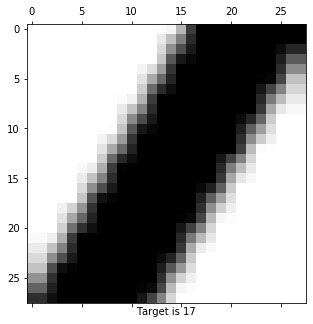

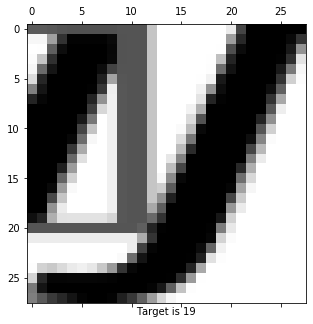

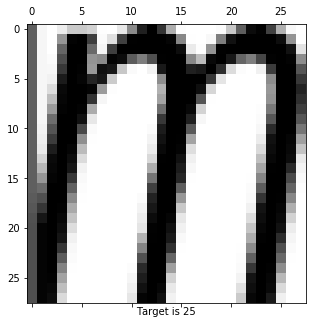

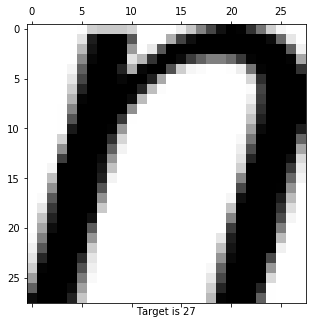

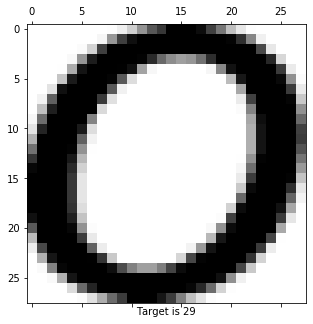

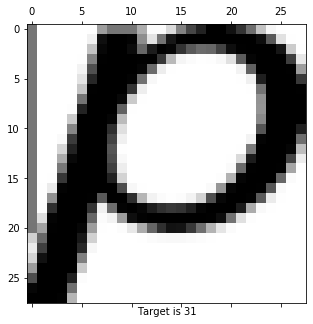

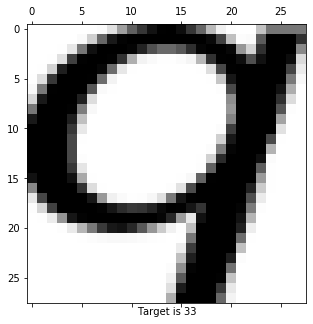

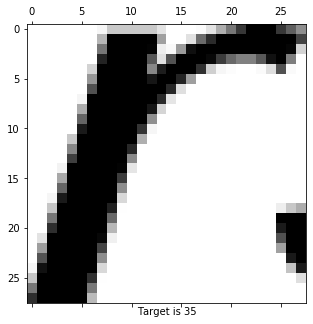

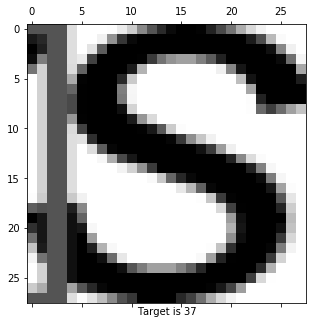

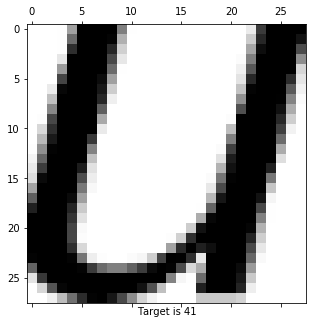

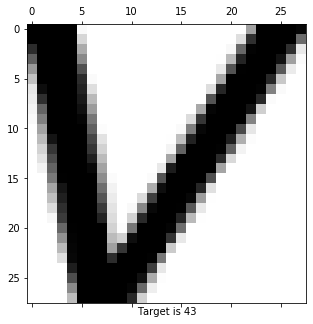

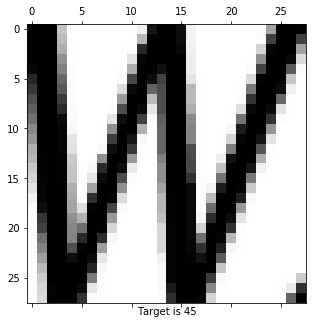

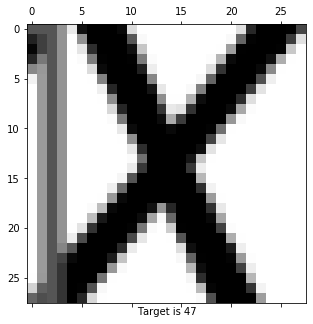

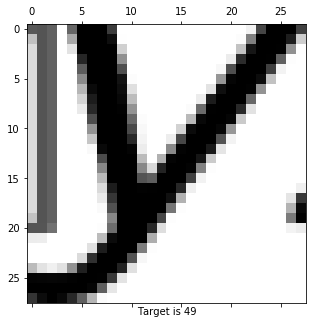

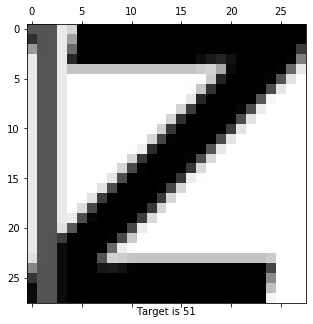

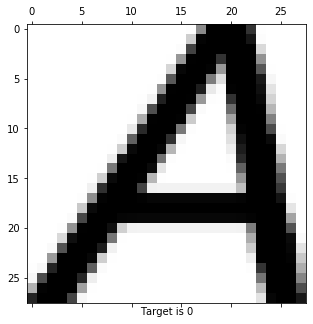

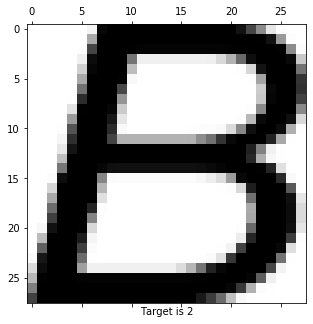

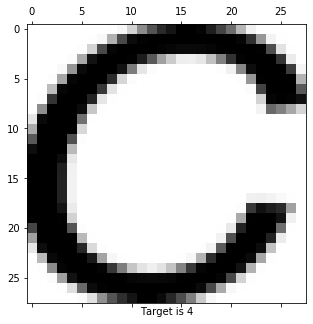

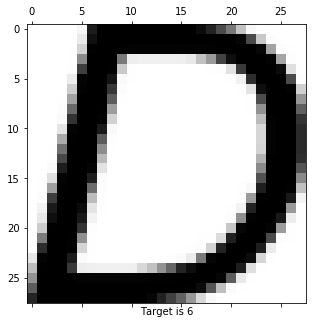

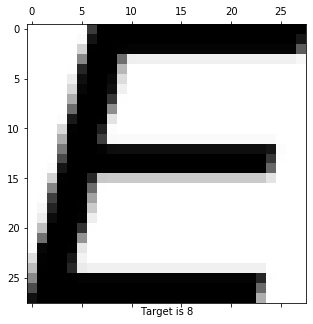

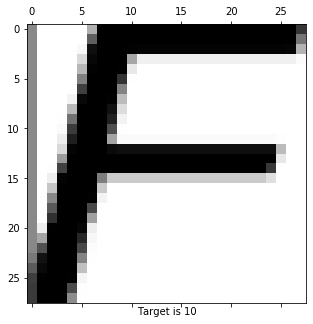

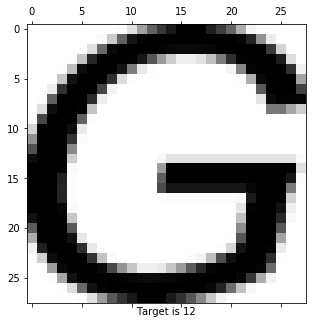

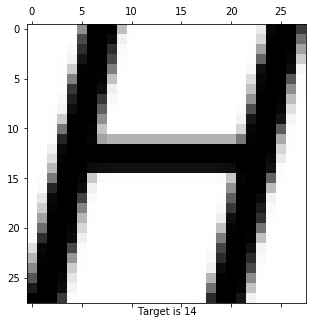

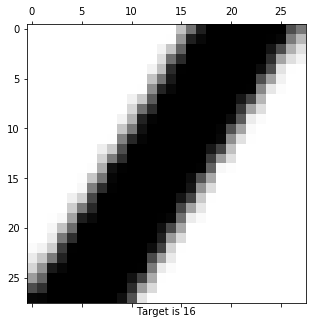

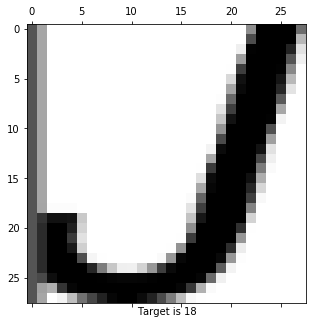

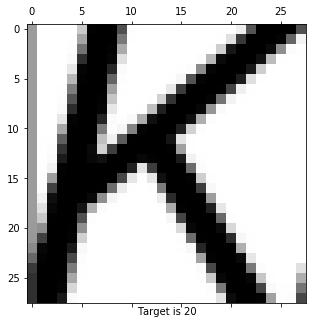

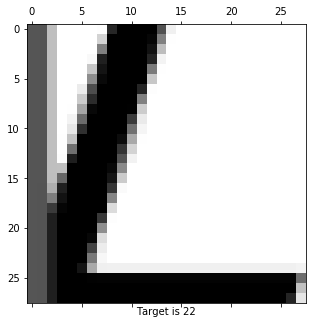

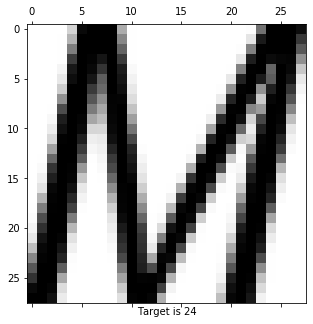

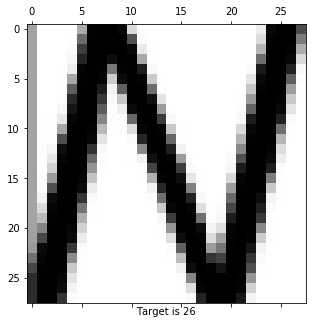

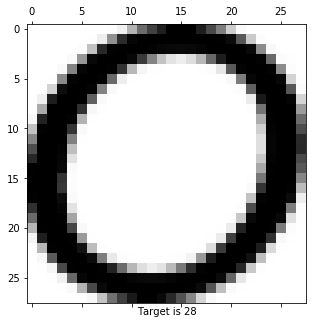

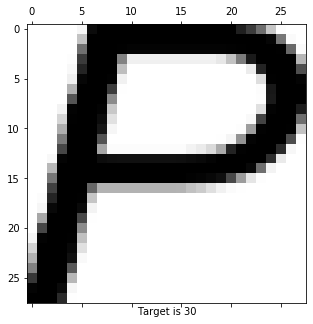

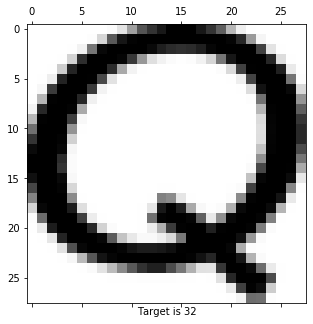

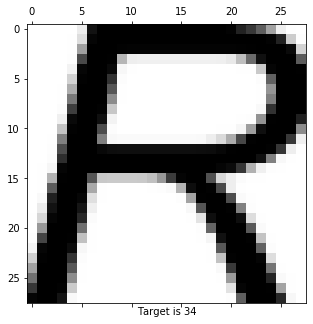

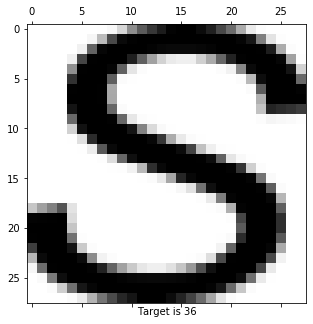

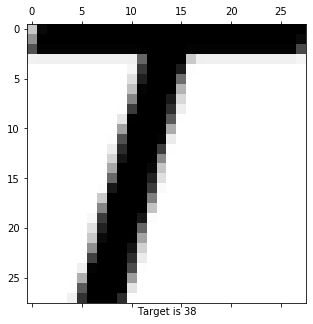

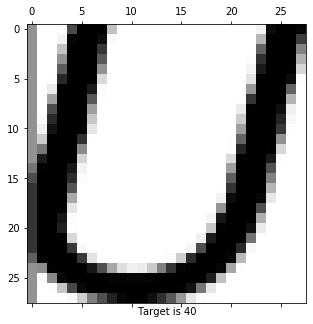

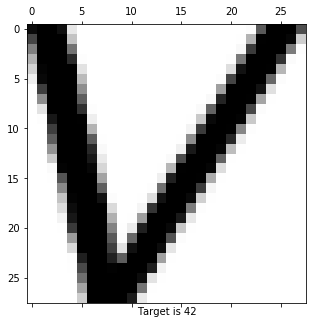

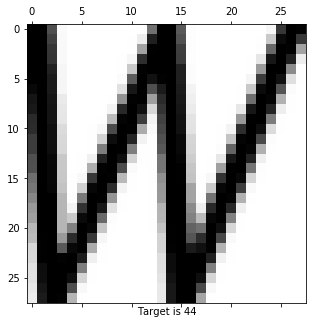

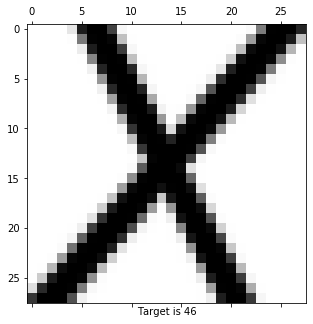

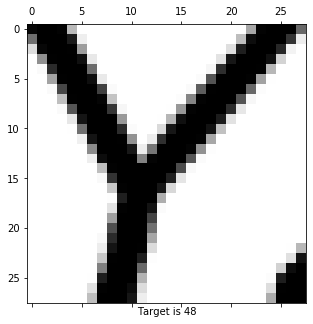

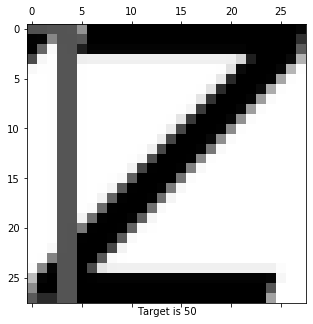

In [5]:
for i in range(0, train.reshape(153,28,28).shape[0]):
    plt.matshow(train.reshape(153,28,28)[i], cmap = 'gray')
    plt.xlabel('Target is ' + str(train_target[i]))

Segments shape:  (593, 28, 28, 1)


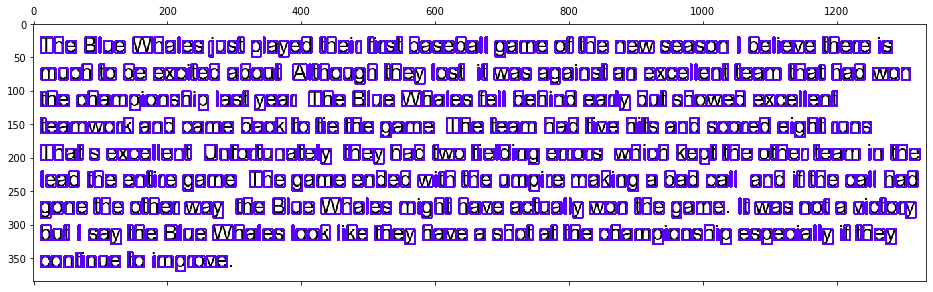

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

#read image
img = cv2.imread('writing_extract.png')

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#find contours
ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
def sort_contours(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

sorted_ctrs = sorted(ctrs, key=lambda x:sort_contours(x, img.shape[1]))

segments = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    area = cv2.contourArea(ctr)
    if area>= 5:
        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        roi = resize(roi, (28, 28, 1))
        #roi = np.reshape(roi, (28,28))
        segments.append(roi)
        #cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
        #print(roi.shape)

test = np.array(segments)
print('Segments shape: ', test.shape)

plt.matshow(img)

In [7]:
plt.rcParams["figure.figsize"] = (5,5)

In [8]:
unique_target = list('TheBlueWhalesjustplayedtheirfirstbaseballgameofthenewseasonIbelievethereismuchtobeexcitedaboutAlthoughtheylostitwasagainstanexcellentteamthathadwonthechampionshiplastyearTheBlueWhalesfellbehindearlybutshowedexcellentteamworkandcamebacktotiethegameTheteamhadfivehitsandscoredeightrunsThatsexcellentUnfortunatelytheyhadtwofieldingerrorswhichkepttheotherteamintheleadtheentiregameThegameendedwiththeumpiremakingabadcallandifthecallhadgonetheotherwaytheBlueWhalesmighthaveactuallywonthegameItwasnotavictorybutIsaytheBlueWhaleslookliketheyhaveashotatthechampionshipespeciallyiftheycontinuetoimprove')

test_target = []
for i in unique_target:
    test_target.append(letter_map[i])
    
test_target = np.array(test_target)

print('Target shape:', test_target.shape)

Target shape: (593,)


In [9]:
n_samples = len(test)

In [10]:
X_train = train
y_train = train_target
X_val = test[:round(.8 * n_samples)]
y_val = test_target[:round(.8 * n_samples)]
X_test = test[round(.8 * n_samples):]
y_test = test_target[round(.8 * n_samples):]

In [11]:
X_test.shape

(119, 28, 28, 1)

In [12]:
y_test.shape

(119,)

In [13]:
X_train[0].shape

(28, 28, 1)

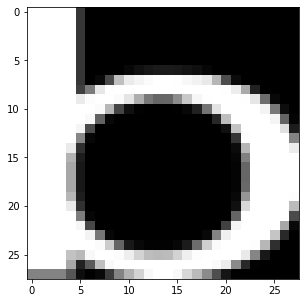

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [15]:
print(list(letter_map.keys())[list(letter_map.values()).index(train_target[0])])

b


In [16]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

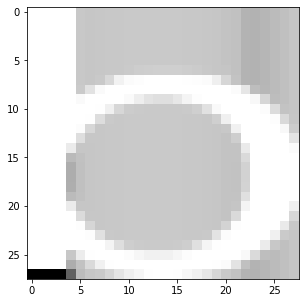

In [17]:
plt.imshow(X_train[0, :, :, 0],cmap=plt.cm.binary)
plt.show()

In [18]:
epochs = 20
learning_rate = 0.001

In [19]:
from tensorflow.keras.optimizers import Adam

In [20]:
adam = Adam(lr=learning_rate)

In [21]:
model = tf.keras.models.Sequential()

In [22]:
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [25]:
logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

In [26]:
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model_fit = model.fit(X_train, y_train, epochs=epochs, batch_size = 10, validation_data=(X_val, y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 153 samples, validate on 474 samples
Epoch 1/20
153/153 [==============================] - 2s 13ms/sample - loss: 4.0036 - acc: 0.0000e+00 - val_loss: 3.9011 - val_acc: 0.1498
Epoch 2/20
153/153 [==============================] - 1s 7ms/sample - loss: 3.7884 - acc: 0.2680 - val_loss: 3.6820 - val_acc: 0.1941
Epoch 3/20
153/153 [==============================] - 1s 7ms/sample - loss: 3.4194 - acc: 0.2680 - val_loss: 3.1813 - val_acc: 0.4747
Epoch 4/20
153/153 [==============================] - 1s 6ms/sample - loss: 2.7012 - acc: 0.4902 - val_loss: 2.6253 - val_acc: 0.2764
Epoch 5/20
153/153 [==============================] - 1s 6ms/sample - loss: 1.8115 - acc: 0.6078 - val_loss: 1.8037 - val_acc: 0.6561
Epoch 6/20
153/153 [==============================] - 1s 6ms/sample - loss: 1.1310 - acc: 0.7320 - val_loss: 1.2905 - val_acc: 0.7278
Epoch 7/20
153/153 [==============================] - 1s 6ms/sam

In [28]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Loss: ' + str(val_loss))
print('Accuracy: ' + str(val_acc))

474/474 [==============================] - 0s 588us/sample - loss: 0.6199 - acc: 0.8249s - loss: 0.6167 - acc: 0.83
Loss: 0.6199128476879264
Accuracy: 0.8248945


In [29]:
from sklearn.metrics import confusion_matrix
y_val_pred = model.predict_classes(X_val)
c_matrix = confusion_matrix(y_val, y_val_pred)

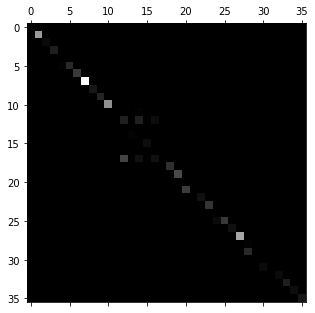

In [30]:
plt.matshow(c_matrix, cmap=plt.cm.gray)
plt.show()

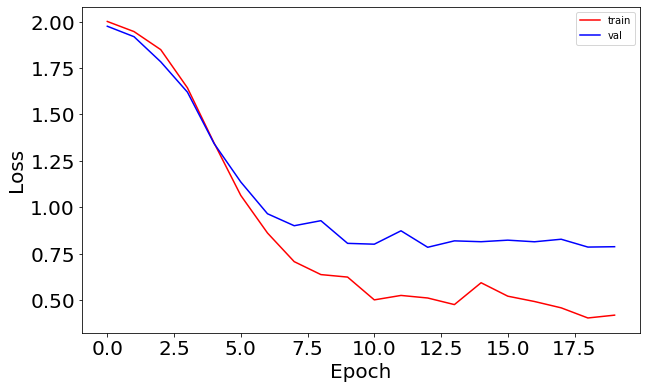

In [31]:
# plot loss
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

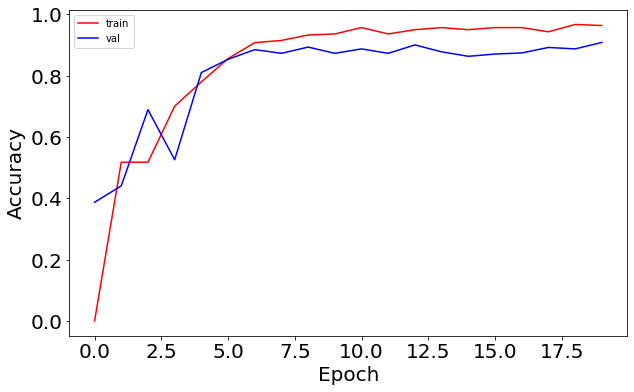

In [32]:
# Plot accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_fit.history['acc']), 'r', label='train')
ax.plot(np.sqrt(model_fit.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History

from tensorflow.keras import losses
from sklearn.utils import shuffle

In [34]:
# solution
epochs = 20
learning_rate = 0.1 # initial learning rate
decay_rate = learning_rate / epochs

# define the optimizer function
sgd = SGD(lr=learning_rate, nesterov=False)

input_dim = X_train.shape[1]
num_classes = 10
batch_size = 20

# build the model
lr_model = tf.keras.models.Sequential()

lr_model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
lr_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

lr_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
lr_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

lr_model.add(tf.keras.layers.Flatten())

lr_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

lr_model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))


#compile
lr_model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# you invoke the LearningRateScheduler during the .fit() phase
lr_model_model_hist = lr_model.fit(X_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(X_test, y_test))

Train on 153 samples, validate on 119 samples
Epoch 1/20
153/153 [==============================] - 1s 6ms/sample - loss: 3.9562 - acc: 0.0065 - val_loss: 3.9526 - val_acc: 0.0084
Epoch 2/20
153/153 [==============================] - 1s 4ms/sample - loss: 3.9525 - acc: 0.0000e+00 - val_loss: 3.9519 - val_acc: 0.0000e+00
Epoch 3/20
153/153 [==============================] - 1s 5ms/sample - loss: 3.9498 - acc: 0.0196 - val_loss: 3.9540 - val_acc: 0.0000e+00
Epoch 4/20
153/153 [==============================] - 1s 6ms/sample - loss: 3.9473 - acc: 0.0261 - val_loss: 3.9511 - val_acc: 0.0000e+00
Epoch 5/20
153/153 [==============================] - 1s 5ms/sample - loss: 3.9457 - acc: 0.0392 - val_loss: 3.9515 - val_acc: 0.0000e+00
Epoch 6/20
153/153 [==============================] - 1s 6ms/sample - loss: 3.9432 - acc: 0.0261 - val_loss: 3.9497 - val_acc: 0.0000e+00
Epoch 7/20
153/153 [==============================] - 1s 4ms/sample - loss: 3.9395 - acc: 0.0392 - val_loss: 3.9494 - val_acc:

## Loss and accuracy curves

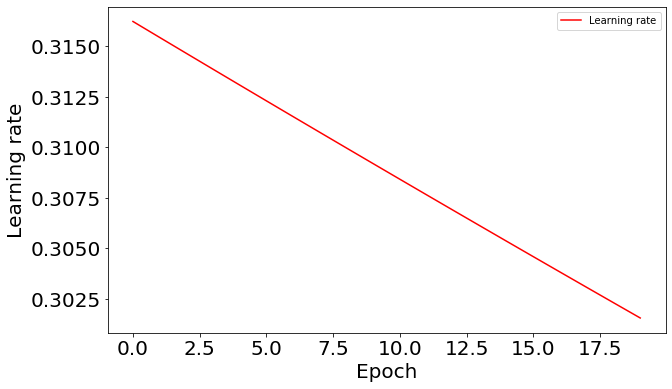

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_model_hist.history['lr']), 'r', label='Learning rate')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Learning rate', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

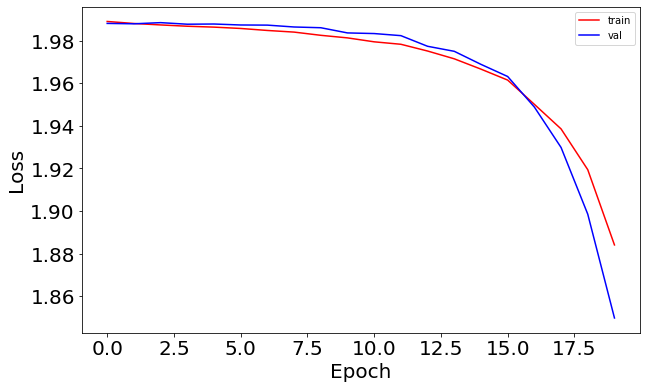

In [36]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_model_hist.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_model_hist.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
# how loss decreses with decreasing learning rate

In [37]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    epochs = 20
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    sgd = SGD(lr=learning_rate, decay=decay_rate, nesterov=False)
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    
    model.compile(optimizer=sgd,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [38]:
#from create_model import create_model
from sklearn.model_selection import GridSearchCV
new_model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=new_model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best using %s" % ( grid_result.best_params_))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Best using {'batch_size': 40, 'epochs': 10}


## Final Predict

#### Using the best parameters

In [39]:
epochs = 20
learning_rate = 0.001

from tensorflow.keras.optimizers import Adam

adam = Adam(lr=learning_rate)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(128, (3, 3), input_shape=X_train.shape[1:], activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

logits = model.add(tf.keras.layers.Dense(max(train_target) + 1, activation=tf.nn.softmax))

model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size = 10)

Train on 153 samples
Epoch 1/20
153/153 [==============================] - 2s 11ms/sample - loss: 3.9771 - acc: 0.0261
Epoch 2/20
153/153 [==============================] - 1s 9ms/sample - loss: 3.9360 - acc: 0.1176
Epoch 3/20
153/153 [==============================] - 1s 7ms/sample - loss: 3.8164 - acc: 0.0915
Epoch 4/20
153/153 [==============================] - 1s 6ms/sample - loss: 3.1987 - acc: 0.2222
Epoch 5/20
153/153 [==============================] - 1s 5ms/sample - loss: 2.0396 - acc: 0.3660
Epoch 6/20
153/153 [==============================] - 1s 6ms/sample - loss: 1.3505 - acc: 0.5882
Epoch 7/20
153/153 [==============================] - 1s 5ms/sample - loss: 0.9558 - acc: 0.7059 0s - loss: 0.8471 - 
Epoch 8/20
153/153 [==============================] - 1s 6ms/sample - loss: 0.9710 - acc: 0.6667
Epoch 9/20
153/153 [==============================] - 1s 7ms/sample - loss: 0.6453 - acc: 0.8039
Epoch 10/20
153/153 [==============================] - 1s 7ms/sample - loss: 0.4978 

In [40]:
y_pred = model.predict_classes(test)

In [41]:
target = []
for i in range(0, len(test_target)):
    target.append(list(letter_map.keys())[list(letter_map.values()).index(test_target[i])])

In [42]:
prediction = []
for i in range(0, len(y_pred)):
    prediction.append(list(letter_map.keys())[list(letter_map.values()).index(y_pred[i])])

In [43]:
print(target)
print('')
print(prediction)

['T', 'h', 'e', 'B', 'l', 'u', 'e', 'W', 'h', 'a', 'l', 'e', 's', 'j', 'u', 's', 't', 'p', 'l', 'a', 'y', 'e', 'd', 't', 'h', 'e', 'i', 'r', 'f', 'i', 'r', 's', 't', 'b', 'a', 's', 'e', 'b', 'a', 'l', 'l', 'g', 'a', 'm', 'e', 'o', 'f', 't', 'h', 'e', 'n', 'e', 'w', 's', 'e', 'a', 's', 'o', 'n', 'I', 'b', 'e', 'l', 'i', 'e', 'v', 'e', 't', 'h', 'e', 'r', 'e', 'i', 's', 'm', 'u', 'c', 'h', 't', 'o', 'b', 'e', 'e', 'x', 'c', 'i', 't', 'e', 'd', 'a', 'b', 'o', 'u', 't', 'A', 'l', 't', 'h', 'o', 'u', 'g', 'h', 't', 'h', 'e', 'y', 'l', 'o', 's', 't', 'i', 't', 'w', 'a', 's', 'a', 'g', 'a', 'i', 'n', 's', 't', 'a', 'n', 'e', 'x', 'c', 'e', 'l', 'l', 'e', 'n', 't', 't', 'e', 'a', 'm', 't', 'h', 'a', 't', 'h', 'a', 'd', 'w', 'o', 'n', 't', 'h', 'e', 'c', 'h', 'a', 'm', 'p', 'i', 'o', 'n', 's', 'h', 'i', 'p', 'l', 'a', 's', 't', 'y', 'e', 'a', 'r', 'T', 'h', 'e', 'B', 'l', 'u', 'e', 'W', 'h', 'a', 'l', 'e', 's', 'f', 'e', 'l', 'l', 'b', 'e', 'h', 'i', 'n', 'd', 'e', 'a', 'r', 'l', 'y', 'b', 'u',